In [1]:
include("MC.jl")

getDF (generic function with 1 method)

In [2]:
ENV["COLUMNS"] = 200;

using Statistics, Dates 

using CSV, NetCDF, DataFrames

In [13]:
using 

In [3]:
using Plots, StatsPlots

In [7]:
using TimeSeries

In [22]:
pyplot()

Plots.PyPlotBackend()

In [6]:
colnams = split("Date/Time	Height [m]	SWD [W/m**2]	SWD std dev [W/m**2]	SWD min [W/m**2]	SWD max [W/m**2]	DIR [W/m**2]	DIR std dev [W/m**2]	DIR min [W/m**2]	DIR max [W/m**2]	DIF [W/m**2]	DIF std dev [W/m**2]	DIF min [W/m**2]	DIF max [W/m**2]	LWD [W/m**2]	LWD std dev [W/m**2]	LWD min [W/m**2]	LWD max [W/m**2]	SWU [W/m**2]	SWU std dev [W/m**2]	SWU min [W/m**2]	SWU max [W/m**2]	LWU [W/m**2]	LWU std dev [W/m**2]	LWU min [W/m**2]	LWU max [W/m**2]	T2 [°C]	RH [%]	PoPoPoPo [hPa]", '	');

29-element Vector{SubString{String}}:
 "Date/Time"
 "Height [m]"
 "SWD [W/m**2]"
 "SWD std dev [W/m**2]"
 "SWD min [W/m**2]"
 "SWD max [W/m**2]"
 "DIR [W/m**2]"
 "DIR std dev [W/m**2]"
 "DIR min [W/m**2]"
 "DIR max [W/m**2]"
 "DIF [W/m**2]"
 "DIF std dev [W/m**2]"
 "DIF min [W/m**2]"
 ⋮
 "LWD max [W/m**2]"
 "SWU [W/m**2]"
 "SWU std dev [W/m**2]"
 "SWU min [W/m**2]"
 "SWU max [W/m**2]"
 "LWU [W/m**2]"
 "LWU std dev [W/m**2]"
 "LWU min [W/m**2]"
 "LWU max [W/m**2]"
 "T2 [°C]"
 "RH [%]"
 "PoPoPoPo [hPa]"

In [3]:
fnam = "PAY_radiation_2020-07.tab";

In [4]:
fn = joinpath("data", fnam)

"data\\PAY_radiation_2020-07.tab"

In [5]:
df = CSV.File(fn; header=false, skipto=42, delim='\t') |> DataFrame

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20
,DateTime,Int64,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?,Int64?,Int64?,Int64?,Float64?
1,2020-07-01T00:00:00,2,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing,missing
2,2020-07-01T00:01:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.2,337,338,0,0.1
3,2020-07-01T00:02:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.1,337,338,0,0.1
4,2020-07-01T00:03:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,1,337,0.1,337,337,0,0.1
5,2020-07-01T00:04:00,2,0,0.1,0,0,0,0.0,0,0,0,0.3,-1,1,337,0.1,337,337,0,0.1
6,2020-07-01T00:05:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.1,337,337,0,0.1
7,2020-07-01T00:06:00,2,0,0.1,0,0,0,0.0,0,0,0,0.3,-1,1,337,0.1,336,337,0,0.1
8,2020-07-01T00:07:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,-1,0,337,0.1,336,337,0,0.1
9,2020-07-01T00:08:00,2,0,0.1,0,0,0,0.0,0,0,0,0.2,0,1,337,0.1,337,337,0,0.1


In [32]:
mean(skipmissing(rad))

280.31551101845

In [6]:
fn1 = joinpath("data", "irradiation_PAY_202007_new.nc")
ncinfo(fn1)


##### NetCDF File #####

C:\Users\xinyuan.hou\solCast\data\irradiation_PAY_202007_new.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
altitude                                            1                         
latitude                                            1                         
time                                                2976                      
longitude                                           1                         

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
rely                            DOUBLE          longitude latitude altitude ti..
altitude                        DOUBLE          altitude                        
time                            INT             time         

In [7]:
ghi, ghiCS = getNCvar.(fn1, ["GHI", "CLEAR_SKY_GHI"])

2-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [8]:
day, hour, minute = getNCvar.(fn1, ["ut_day", "ut_hour", "ut_minute"])

3-element Vector{Vector{Int8}}:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  31, 31, 31, 31, 31, 31, 31, 31, 31, 1]
 [0, 0, 0, 1, 1, 1, 1, 2, 2, 2  …  21, 22, 22, 22, 22, 23, 23, 23, 23, 0]
 [15, 30, 45, 0, 15, 30, 45, 0, 15, 30  …  45, 0, 15, 30, 45, 0, 15, 30, 45, 0]

In [6]:
describe(ghi)

Summary Stats:
Length:         2976
Missing Count:  0
Mean:           69.732237
Minimum:        0.000000
1st Quartile:   0.000000
Median:         34.057938
3rd Quartile:   133.410385
Maximum:        243.231216
Type:           Float64


In [7]:
describe(ghiCS)

Summary Stats:
Length:         2976
Missing Count:  0
Mean:           85.963410
Minimum:        0.000000
1st Quartile:   0.000000
Median:         50.905798
3rd Quartile:   178.188423
Maximum:        246.674347
Type:           Float64


In [20]:
describe(ghiCS)

Summary Stats:
Length:         2976
Missing Count:  0
Mean:           85.963410
Minimum:        0.000000
1st Quartile:   0.000000
Median:         50.905798
3rd Quartile:   178.188423
Maximum:        246.674347
Type:           Float64


### Day1

In [9]:
day1 = df[1:1440, [1,3,7,11]]
DataFrames.rename!(day1, [:time, :swd, :dir, :dif])

,time,swd,dir,dif
,DateTime,Int64?,Int64?,Int64?
1,2020-07-01T00:00:00,missing,missing,missing
2,2020-07-01T00:01:00,0,0,0
3,2020-07-01T00:02:00,0,0,0
4,2020-07-01T00:03:00,0,0,0
5,2020-07-01T00:04:00,0,0,0
6,2020-07-01T00:05:00,0,0,0
7,2020-07-01T00:06:00,0,0,0
8,2020-07-01T00:07:00,0,0,0
9,2020-07-01T00:08:00,0,0,0


In [52]:
day1.ghi = day1.dir + day1.dif

1440-element Vector{Union{Missing, Int64}}:
  missing
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [53]:
mean(skipmissing(day1.ghi))

385.75330090340515

In [28]:
day1 = df[1:1440, [1,3]]
DataFrames.rename!(day1, [:time, :swd])

,time,swd
,DateTime,Int64?
1,2020-07-01T00:00:00,missing
2,2020-07-01T00:01:00,0
3,2020-07-01T00:02:00,0
4,2020-07-01T00:03:00,0
5,2020-07-01T00:04:00,0
6,2020-07-01T00:05:00,0
7,2020-07-01T00:06:00,0
8,2020-07-01T00:07:00,0
9,2020-07-01T00:08:00,0


In [113]:
day1.cmf = day1.swd ./ day1.dir

1440-element Vector{Union{Missing, Float64}}:
    missing
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [10]:
day1_n = transform(day1, :time => ByRow(x->round(x, Dates.Minute(15), RoundUp)), renamecols=false)

,time,swd,dir,dif
,DateTime,Int64?,Int64?,Int64?
1,2020-07-01T00:00:00,missing,missing,missing
2,2020-07-01T00:15:00,0,0,0
3,2020-07-01T00:15:00,0,0,0
4,2020-07-01T00:15:00,0,0,0
5,2020-07-01T00:15:00,0,0,0
6,2020-07-01T00:15:00,0,0,0
7,2020-07-01T00:15:00,0,0,0
8,2020-07-01T00:15:00,0,0,0
9,2020-07-01T00:15:00,0,0,0


In [66]:
day1_nn = combine(groupby(day1_n, :time), :ghi => mean) #, renamecols=false)

,time,ghi_mean
,DateTime,Float64?
1,2020-07-01T00:00:00,missing
2,2020-07-01T00:15:00,0.0
3,2020-07-01T00:30:00,0.0
4,2020-07-01T00:45:00,0.0
5,2020-07-01T01:00:00,0.0
6,2020-07-01T01:15:00,0.0
7,2020-07-01T01:30:00,0.0
8,2020-07-01T01:45:00,0.0
9,2020-07-01T02:00:00,0.0


In [11]:
day1_nn = combine(groupby(day1_n, :time), :swd => mean, :dir => mean, :dif => mean, renamecols=false)

,time,swd,dir,dif
,DateTime,Float64?,Float64?,Float64?
1,2020-07-01T00:00:00,missing,missing,missing
2,2020-07-01T00:15:00,0.0,0.0,0.0
3,2020-07-01T00:30:00,0.0,0.0,0.0
4,2020-07-01T00:45:00,0.0,0.0,0.0
5,2020-07-01T01:00:00,0.0,0.0,0.0
6,2020-07-01T01:15:00,0.0,0.0,0.0
7,2020-07-01T01:30:00,0.0,0.0,0.0
8,2020-07-01T01:45:00,0.0,0.0,0.0
9,2020-07-01T02:00:00,0.0,0.0,0.0


In [32]:
last(day1_nn)

,time,swd
,DateTime,Float64?
97,2020-07-02T00:00:00,0.0


In [119]:
del(day1_nn[1,2] = NaN

In [12]:
day1_nn.ghi = vcat(0, ghi[1:96])
day1_nn.ghiCS = vcat(0, ghiCS[1:96])
day1_nn

,time,swd,dir,dif,ghi,ghiCS
,DateTime,Float64?,Float64?,Float64?,Float64,Float64
1,2020-07-01T00:00:00,missing,missing,missing,0.0,0.0
2,2020-07-01T00:15:00,0.0,0.0,0.0,0.0,0.0
3,2020-07-01T00:30:00,0.0,0.0,0.0,0.0,0.0
4,2020-07-01T00:45:00,0.0,0.0,0.0,0.0,0.0
5,2020-07-01T01:00:00,0.0,0.0,0.0,0.0,0.0
6,2020-07-01T01:15:00,0.0,0.0,0.0,0.0,0.0
7,2020-07-01T01:30:00,0.0,0.0,0.0,0.0,0.0
8,2020-07-01T01:45:00,0.0,0.0,0.0,0.0,0.0
9,2020-07-01T02:00:00,0.0,0.0,0.0,0.0,0.0


In [18]:
te = day1_nn[17:20, :]

,time,swd,dir,dif,ghi,ghiCS
,DateTime,Float64?,Float64?,Float64?,Float64,Float64
1,2020-07-01T04:00:00,10.8667,0.0,11.0667,0.41639,0.986835
2,2020-07-01T04:15:00,24.5333,83.0,21.6,4.29367,5.59369
3,2020-07-01T04:30:00,53.5333,219.867,32.6667,10.6363,12.4223
4,2020-07-01T04:45:00,61.1333,136.733,41.0667,18.2185,20.6691


In [20]:
tes = te[:,2:4] ./ 24

,swd,dir,dif
,Float64,Float64,Float64
1,0.452778,0.0,0.461111
2,1.02222,3.45833,0.9
3,2.23056,9.16111,1.36111
4,2.54722,5.69722,1.71111


In [21]:
tes.sum = tes.dir .+ tes.dif
tes.ghi = te.ghi

4-element Vector{Float64}:
  0.416390061378479
  4.293670177459717
 10.636305809020996
 18.218477249145508

In [22]:
tes

,swd,dir,dif,sum,ghi
,Float64,Float64,Float64,Float64,Float64
1,0.452778,0.0,0.461111,0.461111,0.41639
2,1.02222,3.45833,0.9,4.35833,4.29367
3,2.23056,9.16111,1.36111,10.5222,10.6363
4,2.54722,5.69722,1.71111,7.40833,18.2185


In [59]:
dff = copy(day1_nn)
dff.cmf = dff.ghi ./ dff.ghiCS

97-element Vector{Union{Missing, Float64}}:
    missing
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

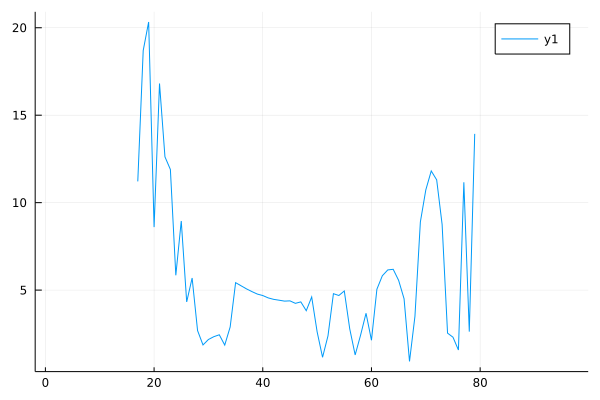

In [62]:
plot(dff.cmf)

In [121]:
day1_ = filter!(:cmf => c -> c.<0.95, day1_nn)

,time,cmf
,DateTime,Float64?
1,2020-07-01T04:15:00,0.240634
2,2020-07-01T04:45:00,0.295965
3,2020-07-01T05:00:00,0.377965
4,2020-07-01T05:15:00,0.566522
5,2020-07-01T08:15:00,0.869119
6,2020-07-01T08:30:00,0.86215
7,2020-07-01T08:45:00,0.877472
8,2020-07-01T09:00:00,0.895651
9,2020-07-01T09:15:00,0.916408


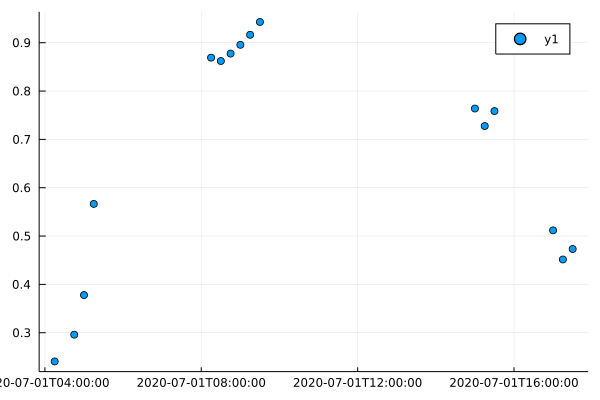

In [129]:
@df day1_ scatter(:time, :cmf)

In [52]:
ta = TimeArray(day1_n; timestamp=:time)

1440×1 TimeArray{Union{Missing, Int64}, 1, DateTime, Vector{Union{Missing, Int64}}} 2020-07-01T00:00:00 to 2020-07-01T23:45:00
│                     │ swd     │
├─────────────────────┼─────────┤
│ 2020-07-01T00:00:00 │ missing │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ 2020-07-01T00:00:00 │ 0       │
│ ⋮                   │ ⋮       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │
│ 2020-07-01T23:45:00 │ 0       │

In [53]:
ta1 = collapse(ta, minute, last, mean)

96×1 TimeArray{Union{Missing, Float64}, 1, DateTime, Vector{Union{Missing, Float64}}} 2020-07-01T00:00:00 to 2020-07-01T23:45:00
│                     │ swd     │
├─────────────────────┼─────────┤
│ 2020-07-01T00:00:00 │ missing │
│ 2020-07-01T00:15:00 │ 0.0     │
│ 2020-07-01T00:30:00 │ 0.0     │
│ 2020-07-01T00:45:00 │ 0.0     │
│ 2020-07-01T01:00:00 │ 0.0     │
│ 2020-07-01T01:15:00 │ 0.0     │
│ 2020-07-01T01:30:00 │ 0.0     │
│ 2020-07-01T01:45:00 │ 0.0     │
│ 2020-07-01T02:00:00 │ 0.0     │
│ 2020-07-01T02:15:00 │ 0.0     │
│ 2020-07-01T02:30:00 │ 0.0     │
│ ⋮                   │ ⋮       │
│ 2020-07-01T21:30:00 │ 0.0     │
│ 2020-07-01T21:45:00 │ 0.0     │
│ 2020-07-01T22:00:00 │ 0.0     │
│ 2020-07-01T22:15:00 │ 0.0     │
│ 2020-07-01T22:30:00 │ 0.0     │
│ 2020-07-01T22:45:00 │ 0.0     │
│ 2020-07-01T23:00:00 │ 0.0     │
│ 2020-07-01T23:15:00 │ 0.0     │
│ 2020-07-01T23:30:00 │ 0.0     │
│ 2020-07-01T23:45:00 │ 0.0     │

In [65]:
plot(ta1[:swd], leg=:none,
    xticks=xtime[1:180:1440])

MethodError: MethodError: no method matching isless(::Float64, ::String)
[0mClosest candidates are:
[0m  isless([91m::AbstractString[39m, ::AbstractString) at strings/basic.jl:344
[0m  isless(::Real, [91m::AbstractGray{T} where T[39m) at C:\Users\xinyuan.hou\.julia\packages\ColorTypes\6m8P7\src\operations.jl:32
[0m  isless(::AbstractFloat, [91m::Union{StatsBase.PValue, StatsBase.TestStat}[39m) at C:\Users\xinyuan.hou\.julia\packages\StatsBase\DU1bT\src\statmodels.jl:524
[0m  ...

In [72]:
timepoint = day1_nn.time
xtime = Dates.format.(day1_nn.time, "HH:MM")

96-element Vector{String}:
 "00:00"
 "00:15"
 "00:30"
 "00:45"
 "01:00"
 "01:15"
 "01:30"
 "01:45"
 "02:00"
 "02:15"
 "02:30"
 "02:45"
 "03:00"
 ⋮
 "21:00"
 "21:15"
 "21:30"
 "21:45"
 "22:00"
 "22:15"
 "22:30"
 "22:45"
 "23:00"
 "23:15"
 "23:30"
 "23:45"

In [91]:
collect(1:12:96)

8-element Vector{Int64}:
  1
 13
 25
 37
 49
 61
 73
 85

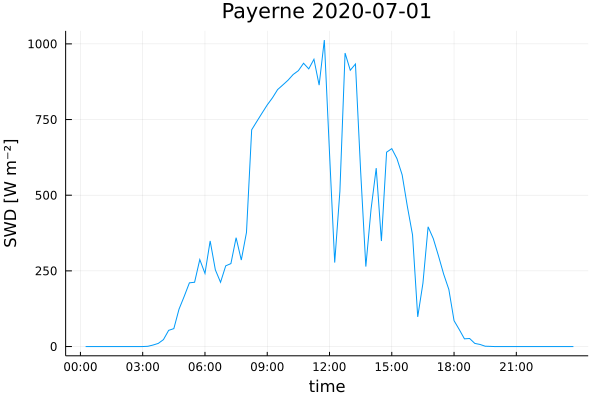

In [95]:
plot(timepoint, day1_nn.swd, leg=:none,
    xticks=(timepoint[1:12:96], xtime[1:12:96]),  #[1;12:12:96+11]]),
    xlabel="time", ylabel="SWD [W m⁻²]", title="Payerne 2020-07-01")

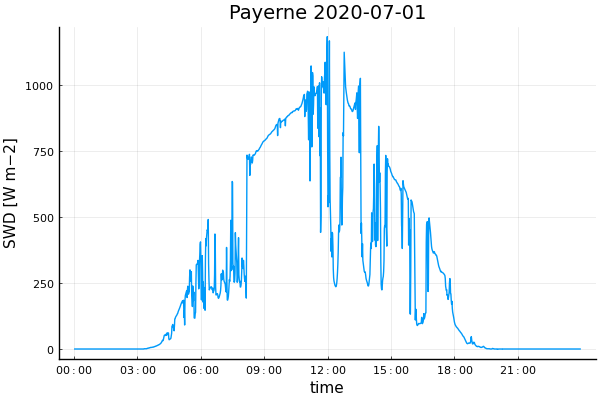

In [92]:
plot(time, day1.Column3, leg=:none,
    xticks=(time[1:180:1440], xtime[1:180:1440]),
    xlabel="time", ylabel="SWD [W m−2]", title="Payerne 2020-07-01")

In [82]:
te = day1[721:720+11,:]

,Column1,Column3
,DateTime,Int64?
1,2020-07-01T12:00:00,777
2,2020-07-01T12:01:00,539
3,2020-07-01T12:02:00,582
4,2020-07-01T12:03:00,554
5,2020-07-01T12:04:00,913
6,2020-07-01T12:05:00,1168
7,2020-07-01T12:06:00,764
8,2020-07-01T12:07:00,569
9,2020-07-01T12:08:00,511


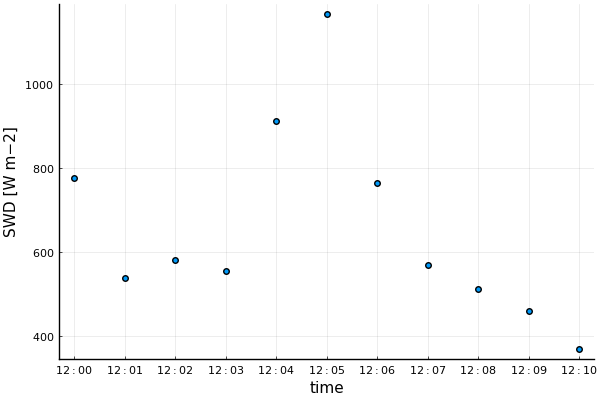

In [93]:
scatter(te.Column1, te.Column3, leg=false,
    xticks=(te.Column1, xtime[721:720+11]),
    xlabel="time", ylabel="SWD [W m−2]")

### Whole month

In [100]:
jul = df[:, [1,3]]
DataFrames.rename!(jul, [:time, :swd])

,time,swd
,DateTime,Int64?
1,2020-07-01T00:00:00,missing
2,2020-07-01T00:01:00,0
3,2020-07-01T00:02:00,0
4,2020-07-01T00:03:00,0
5,2020-07-01T00:04:00,0
6,2020-07-01T00:05:00,0
7,2020-07-01T00:06:00,0
8,2020-07-01T00:07:00,0
9,2020-07-01T00:08:00,0


In [102]:
last(jul)

,time,swd
,DateTime,Int64?
44640,2020-07-31T23:59:00,missing


In [103]:
days_n = transform(jul, :time => ByRow(x->round(x, Dates.Minute(15), RoundDown)), renamecols=false)
days_nn = combine(groupby(days_n, :time), :swd => mean, renamecols=false)

,time,swd
,DateTime,Float64?
1,2020-07-01T00:00:00,missing
2,2020-07-01T00:15:00,0.0
3,2020-07-01T00:30:00,0.0
4,2020-07-01T00:45:00,0.0
5,2020-07-01T01:00:00,0.0
6,2020-07-01T01:15:00,0.0
7,2020-07-01T01:30:00,0.0
8,2020-07-01T01:45:00,0.0
9,2020-07-01T02:00:00,0.0


### Solar zenith angle

In [26]:
sind(Φ)cosd(Φ)

0.4989968572916426

In [13]:
const Φ = 46.815 # local latitude

46.815

In [20]:
31+29+31+30+31+30

182

In [15]:
δ = -23.44 * cosd(360/365*(183+10)) # current declination of Sun

23.058145846053417

In [16]:
h = -15*8 # hour angle in local solar time # 4am: 8 hr before noon

-120

In [17]:
cos_sza() = sind(Φ)sind(δ) + cosd(Φ)cosd(δ)cosd(h)

-0.029259029836477324

In [19]:
cosSza(δ, h; Φ) = sind(Φ)sind(δ) + cosd(Φ)cosd(δ)cosd(h)

cosSza (generic function with 1 method)

In [30]:
cosd(h)

-0.5

In [21]:
df = copy(day1_nn)

,time,swd,dir,dif,ghi,ghiCS
,DateTime,Float64?,Float64?,Float64?,Float64,Float64
1,2020-07-01T00:00:00,missing,missing,missing,0.0,0.0
2,2020-07-01T00:15:00,0.0,0.0,0.0,0.0,0.0
3,2020-07-01T00:30:00,0.0,0.0,0.0,0.0,0.0
4,2020-07-01T00:45:00,0.0,0.0,0.0,0.0,0.0
5,2020-07-01T01:00:00,0.0,0.0,0.0,0.0,0.0
6,2020-07-01T01:15:00,0.0,0.0,0.0,0.0,0.0
7,2020-07-01T01:30:00,0.0,0.0,0.0,0.0,0.0
8,2020-07-01T01:45:00,0.0,0.0,0.0,0.0,0.0
9,2020-07-01T02:00:00,0.0,0.0,0.0,0.0,0.0


In [22]:
df1 = df[18:30, :]

,time,swd,dir,dif,ghi,ghiCS
,DateTime,Float64?,Float64?,Float64?,Float64,Float64
1,2020-07-01T04:15:00,24.5333,83.0,21.6,4.29367,5.59369
2,2020-07-01T04:30:00,53.5333,219.867,32.6667,10.6363,12.4223
3,2020-07-01T04:45:00,61.1333,136.733,41.0667,18.2185,20.6691
4,2020-07-01T05:00:00,129.133,452.133,50.1333,26.0276,29.8758
5,2020-07-01T05:15:00,161.667,431.733,70.0,32.8272,39.7571
6,2020-07-01T05:30:00,224.4,498.333,97.9333,36.9614,50.1227
7,2020-07-01T05:45:00,201.333,223.467,132.267,42.8301,60.8323
8,2020-07-01T06:00:00,305.467,512.667,129.733,50.8196,71.7723
9,2020-07-01T06:15:00,242.467,199.133,159.267,59.8175,82.882


In [23]:
df1[1,1]

2020-07-01T04:15:00

In [31]:
df1.day = Dates.day.(df1[:,1])

13-element Vector{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [48]:
df1[:, :sunDec] .= -23.44 * cosd(360/365*(182+10+1))

13-element Vector{Float64}:
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417
 23.058145846053417

In [49]:
df1

,time,swd,dir,dif,ghi,ghiCS,day,te,sunDec
,DateTime,Float64?,Float64?,Float64?,Float64,Float64,Int64,Int64,Float64
1,2020-07-01T04:15:00,24.5333,83.0,21.6,4.29367,5.59369,1,100,23.0581
2,2020-07-01T04:30:00,53.5333,219.867,32.6667,10.6363,12.4223,1,100,23.0581
3,2020-07-01T04:45:00,61.1333,136.733,41.0667,18.2185,20.6691,1,100,23.0581
4,2020-07-01T05:00:00,129.133,452.133,50.1333,26.0276,29.8758,1,100,23.0581
5,2020-07-01T05:15:00,161.667,431.733,70.0,32.8272,39.7571,1,100,23.0581
6,2020-07-01T05:30:00,224.4,498.333,97.9333,36.9614,50.1227,1,100,23.0581
7,2020-07-01T05:45:00,201.333,223.467,132.267,42.8301,60.8323,1,100,23.0581
8,2020-07-01T06:00:00,305.467,512.667,129.733,50.8196,71.7723,1,100,23.0581
9,2020-07-01T06:15:00,242.467,199.133,159.267,59.8175,82.882,1,100,23.0581


In [56]:
time2 = DateTime(2020, 7, 1, 12)

2020-07-01T12:00:00

In [57]:
time1 = Dates.df1[3,1]

2020-07-01T04:45:00

In [82]:
time2 - time1

26100000 milliseconds

In [83]:
round(time2 - time1, Minute)

435 minutes

In [95]:
t2 = Time(12)

12:00:00

In [96]:
t1 = Time(df1[5,1])

05:15:00

In [103]:
Dates.value(round(t2 - t1, Minute))

405

In [87]:
ByRow()

(::ByRow{DataFrame}) (generic function with 2 methods)

In [107]:
df_te = transform(df1, :time => ByRow(t->Dates.value(round(Time(12)-Time(t), Minute))*d_h))

,time,swd,dir,dif,ghi,ghiCS,day,te,sunDec,time_function
,DateTime,Float64?,Float64?,Float64?,Float64,Float64,Int64,Int64,Float64,Float64
1,2020-07-01T04:15:00,24.5333,83.0,21.6,4.29367,5.59369,1,100,23.0581,116.25
2,2020-07-01T04:30:00,53.5333,219.867,32.6667,10.6363,12.4223,1,100,23.0581,112.5
3,2020-07-01T04:45:00,61.1333,136.733,41.0667,18.2185,20.6691,1,100,23.0581,108.75
4,2020-07-01T05:00:00,129.133,452.133,50.1333,26.0276,29.8758,1,100,23.0581,105.0
5,2020-07-01T05:15:00,161.667,431.733,70.0,32.8272,39.7571,1,100,23.0581,101.25
6,2020-07-01T05:30:00,224.4,498.333,97.9333,36.9614,50.1227,1,100,23.0581,97.5
7,2020-07-01T05:45:00,201.333,223.467,132.267,42.8301,60.8323,1,100,23.0581,93.75
8,2020-07-01T06:00:00,305.467,512.667,129.733,50.8196,71.7723,1,100,23.0581,90.0
9,2020-07-01T06:15:00,242.467,199.133,159.267,59.8175,82.882,1,100,23.0581,86.25


In [ ]:
round(Time(12)-Time(t), Minute)

In [ ]:
h_te = ByRow(round(Time(12)-Time(df1[row, 1]), Minute)*d_h)

In [84]:
d_h = 15/60

0.25

In [53]:
Dates.hour(df1[2,1]) 

4

In [103]:
days_n = transform(jul, :time => ByRow(x->round(x, Dates.Minute(15), RoundDown)), renamecols=false)
days_nn = combine(groupby(days_n, :time), :swd => mean, renamecols=false)

,time,swd
,DateTime,Float64?
1,2020-07-01T00:00:00,missing
2,2020-07-01T00:15:00,0.0
3,2020-07-01T00:30:00,0.0
4,2020-07-01T00:45:00,0.0
5,2020-07-01T01:00:00,0.0
6,2020-07-01T01:15:00,0.0
7,2020-07-01T01:30:00,0.0
8,2020-07-01T01:45:00,0.0
9,2020-07-01T02:00:00,0.0


In [19]:
cosSza(δ, h; Φ) = sind(Φ)sind(δ) + cosd(Φ)cosd(δ)cosd(h)

cosSza (generic function with 1 method)

In [122]:
df_te = transform(df_te, [:sunDec, :time_function] => ByRow((δ, h) -> sind(Φ)sind(δ) + cosd(Φ)cosd(δ)cosd(h)) => :cosSza)

,time,swd,dir,dif,ghi,ghiCS,day,te,sunDec,time_function,cosSza
,DateTime,Float64?,Float64?,Float64?,Float64,Float64,Int64,Int64,Float64,Float64,Float64
1,2020-07-01T04:15:00,24.5333,83.0,21.6,4.29367,5.59369,1,100,23.0581,116.25,0.00708072
2,2020-07-01T04:30:00,53.5333,219.867,32.6667,10.6363,12.4223,1,100,23.0581,112.5,0.044613
3,2020-07-01T04:45:00,61.1333,136.733,41.0667,18.2185,20.6691,1,100,23.0581,108.75,0.0831772
4,2020-07-01T05:00:00,129.133,452.133,50.1333,26.0276,29.8758,1,100,23.0581,105.0,0.122608
5,2020-07-01T05:15:00,161.667,431.733,70.0,32.8272,39.7571,1,100,23.0581,101.25,0.162737
6,2020-07-01T05:30:00,224.4,498.333,97.9333,36.9614,50.1227,1,100,23.0581,97.5,0.203392
7,2020-07-01T05:45:00,201.333,223.467,132.267,42.8301,60.8323,1,100,23.0581,93.75,0.244399
8,2020-07-01T06:00:00,305.467,512.667,129.733,50.8196,71.7723,1,100,23.0581,90.0,0.285582
9,2020-07-01T06:15:00,242.467,199.133,159.267,59.8175,82.882,1,100,23.0581,86.25,0.326765


In [125]:
df1 = transform(df_te, [:dir, :dif, :cosSza] => ByRow( (dni, dhi, c) -> dhi + dni*c ) => :ghi_new)

,time,swd,dir,dif,ghi,ghiCS,day,te,sunDec,time_function,cosSza,ghi_new
,DateTime,Float64?,Float64?,Float64?,Float64,Float64,Int64,Int64,Float64,Float64,Float64,Float64
1,2020-07-01T04:15:00,24.5333,83.0,21.6,4.29367,5.59369,1,100,23.0581,116.25,0.00708072,22.1877
2,2020-07-01T04:30:00,53.5333,219.867,32.6667,10.6363,12.4223,1,100,23.0581,112.5,0.044613,42.4756
3,2020-07-01T04:45:00,61.1333,136.733,41.0667,18.2185,20.6691,1,100,23.0581,108.75,0.0831772,52.4398
4,2020-07-01T05:00:00,129.133,452.133,50.1333,26.0276,29.8758,1,100,23.0581,105.0,0.122608,105.569
5,2020-07-01T05:15:00,161.667,431.733,70.0,32.8272,39.7571,1,100,23.0581,101.25,0.162737,140.259
6,2020-07-01T05:30:00,224.4,498.333,97.9333,36.9614,50.1227,1,100,23.0581,97.5,0.203392,199.29
7,2020-07-01T05:45:00,201.333,223.467,132.267,42.8301,60.8323,1,100,23.0581,93.75,0.244399,186.882
8,2020-07-01T06:00:00,305.467,512.667,129.733,50.8196,71.7723,1,100,23.0581,90.0,0.285582,276.142
9,2020-07-01T06:15:00,242.467,199.133,159.267,59.8175,82.882,1,100,23.0581,86.25,0.326765,224.336


In [126]:
df2 = select(df1, [:swd, :ghi_new, :ghi, :ghiCS])

,swd,ghi_new,ghi,ghiCS
,Float64?,Float64,Float64,Float64
1,24.5333,22.1877,4.29367,5.59369
2,53.5333,42.4756,10.6363,12.4223
3,61.1333,52.4398,18.2185,20.6691
4,129.133,105.569,26.0276,29.8758
5,161.667,140.259,32.8272,39.7571
6,224.4,199.29,36.9614,50.1227
7,201.333,186.882,42.8301,60.8323
8,305.467,276.142,50.8196,71.7723
9,242.467,224.336,59.8175,82.882


In [127]:
df2.ratio = df2.ghi_new ./ df2.ghi

13-element Vector{Float64}:
 5.167537002181118
 3.9934531419002766
 2.8783837310259925
 4.056027467584624
 4.272647299356086
 5.391843156216257
 4.363328655042332
 5.433759322807086
 3.7503506736392263
 4.724304715448172
 3.202338495979738
 2.510184376346495
 2.7164255006672926

### solarData

In [4]:
fn = joinpath("data", "te.csv")

"data\\te.csv"

In [4]:
fn = joinpath("data", fnam)

"data\\PAY_radiation_2020-07.tab"

In [5]:
df = CSV.File(fn; delim=',') |> DataFrame

,Time,dw_solar,direct_n,diffuse,dw_longwave,temp,rh,pressure,zen,Ics,Icsb,Icsd,Ioh
,String,String,String,String,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-07-01 00:00:00,NA,NA,NA,NA,16.6,93.2,957.0,109.898,0.0,0.0,0.0,0.0
2,2020-07-01 00:15:00,0,0,0,337,16.4267,93.32,957.0,109.732,0.0,0.0,0.0,0.0
3,2020-07-01 00:30:00,0,0,0,337,16.2867,93.66,957.0,109.31,0.0,0.0,0.0,0.0
4,2020-07-01 00:45:00,0,0,0,336.333333333333,16.3467,93.7867,957.0,108.729,0.0,0.0,0.0,0.0
5,2020-07-01 01:00:00,0,0,0,336,16.2733,92.6733,957.0,107.994,0.0,0.0,0.0,0.0
6,2020-07-01 01:15:00,0,0,0,334.533333333333,16.0,92.6467,957.0,107.109,0.0,0.0,0.0,0.0
7,2020-07-01 01:30:00,0,0,0,333.466666666667,15.7133,93.6667,957.0,106.08,0.0,0.0,0.0,0.0
8,2020-07-01 01:45:00,0,0,0,333.066666666667,15.3333,94.9933,957.0,104.913,0.0,0.0,0.0,0.0
9,2020-07-01 02:00:00,0,0,0,334.666666666667,15.02,95.9267,957.0,103.615,0.0,0.0,0.0,0.0


In [6]:
df1 = df[:, [:Time, :direct_n, :diffuse, :zen, :Ics]]

,Time,direct_n,diffuse,zen,Ics
,String,String,String,Float64,Float64
1,2020-07-01 00:00:00,NA,NA,109.898,0.0
2,2020-07-01 00:15:00,0,0,109.732,0.0
3,2020-07-01 00:30:00,0,0,109.31,0.0
4,2020-07-01 00:45:00,0,0,108.729,0.0
5,2020-07-01 01:00:00,0,0,107.994,0.0
6,2020-07-01 01:15:00,0,0,107.109,0.0
7,2020-07-01 01:30:00,0,0,106.08,0.0
8,2020-07-01 01:45:00,0,0,104.913,0.0
9,2020-07-01 02:00:00,0,0,103.615,0.0


In [7]:
df1.dir = parse.(Float64, replace!(df1[:, :direct_n], "NA" => "0"))

df1.dif = parse.(Float64, replace!(df1[:, :diffuse], "NA" => "0"));

df1.ghi = df1.dif .+ df1.dir .* cosd.(df1.zen)

df1.cmf = df1.ghi ./ df1.Ics;

In [9]:
df2 = df1[17:30, [1; 4:end]]

,Time,zen,Ics,dir,dif,ghi,cmf
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,2020-07-01 04:00:00,89.3845,0.46151,0.0,11.0667,11.0667,23.9793
2,2020-07-01 04:15:00,87.2284,9.92182,83.0,21.6,25.6134,2.58153
3,2020-07-01 04:30:00,85.0103,32.3279,219.867,32.6667,51.7901,1.60202
4,2020-07-01 04:45:00,82.7353,58.4085,136.733,41.0667,58.357,0.999118
5,2020-07-01 05:00:00,80.4089,90.4089,452.133,50.1333,125.466,1.38776
6,2020-07-01 05:15:00,78.0367,126.615,431.733,70.0,159.492,1.25966
7,2020-07-01 05:30:00,75.6235,165.785,498.333,97.9333,221.666,1.33707
8,2020-07-01 05:45:00,73.1743,207.006,223.467,132.267,196.952,0.951428
9,2020-07-01 06:00:00,70.6939,249.597,512.667,129.733,299.229,1.19885


In [10]:
cmf = df1.cmf
cmf1 = filter(cmf -> (!isnan(cmf) && !isinf(cmf) && cmf .< 1.5), cmf)

1763-element Vector{Float64}:
 0.999117861992276
 1.3877569370164482
 1.2596613150469567
 1.337073391863142
 0.9514281462254593
 1.1988501715221909
 0.7960715690463334
 1.001901261545309
 0.6521223039903828
 0.5019808924520058
 0.55663648584904
 0.5700919958663035
 0.6033326250458957
 ⋮
 0.9983810114494408
 1.014451717701248
 1.0269909846509921
 1.0333871055327823
 1.0304654104632285
 1.0387948175226538
 1.068169799346572
 1.0661993688985498
 1.121732341669085
 1.1321224106199257
 1.274678098460952
 0.9732934542583911

In [208]:
describe(cmf1)

Summary Stats:
Length:         1763
Missing Count:  0
Mean:           0.867207
Minimum:        0.000000
1st Quartile:   0.622757
Median:         1.027082
3rd Quartile:   1.079620
Maximum:        1.493894
Type:           Float64


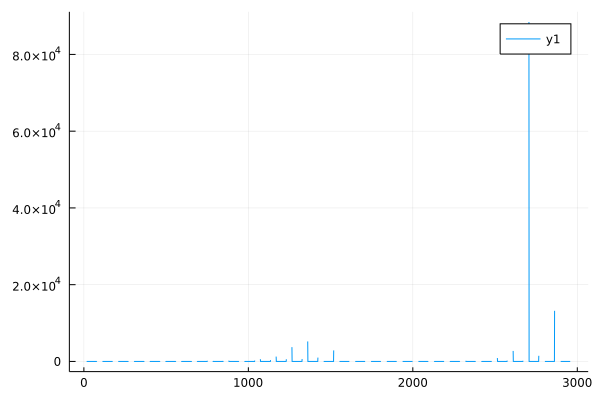

In [197]:
plot(cmf)

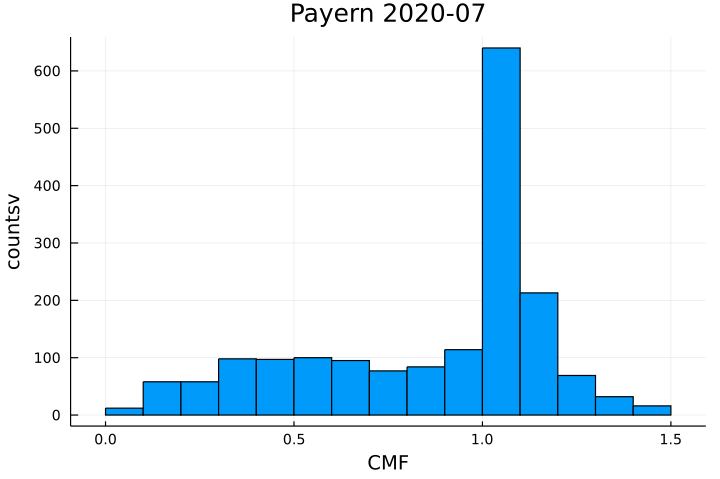

In [16]:
histogram(cmf1, leg=:none, 
          xlabel="CMF", ylabel="countsv", title="Payern 2020-07",
          fmt=:png, dpi=120)